# **Исследовательский анализ данных**

По открытым данным о заведениях общественного питания в Москве был проведен  исследовательский анализ данных.

## Описание данных

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`chain` | сетевой ресторан|
|`object_type` | тип объекта общественного питания|
|`address` | адрес|
|`number` |  количество посадочных мест|



In [2]:
import pandas as pd
import numpy as np
import statistics
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
sns.set_style('darkgrid')
plt.style.use('seaborn-muted')

<ipython-input-2-5a8bb66bfd4f>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


In [3]:
df = pd.read_csv('/content/EDA_restaurants_dataset.csv',
                sep = ',')
df.head(3)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#	сетевой ресторан - смотрим на уникальные
# df.chain.unique()
for col in df.select_dtypes('object'):
    print('--'*10)
    print(df[col].unique())
    print('--'*10)

--------------------
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']
--------------------
--------------------
['нет' 'да']
--------------------
--------------------
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
--------------------
--------------------
['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13']
--------------------


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [8]:
df.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


<ipython-input-19-f3a1276a3ac6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')


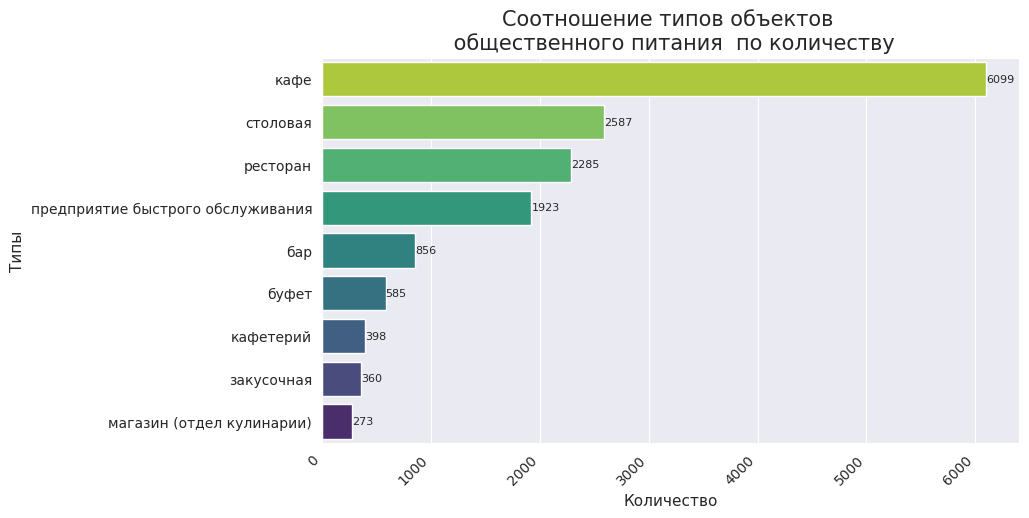

In [19]:
# соотношение типов объектов общественного питания по количеству. график.
fig = plt.figure(figsize = (9, 5))
ax = sns.countplot(y = df['object_type'], palette ='viridis_r', order=df['object_type'].value_counts().index)  # если в обратном порядке: order=df['object_type'].value_counts().index[::-1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
ax.set_title('Соотношение типов объектов \n общественного питания  по количеству', fontsize = 15)
ax.set_xlabel('Количество', fontsize = 11)
ax.set_ylabel('Типы', fontsize = 11)
for label in ax.containers: # подпись количества
    ax.bar_label(label, fontsize = 8)
plt.show()

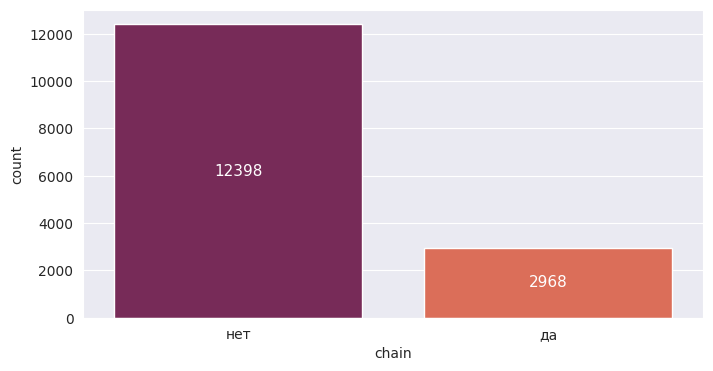

In [10]:
# соотношение сетевых и несетевых заведений по количеству, график
fig = plt.figure(figsize = (8, 4))
ax = sns.countplot(x = df['chain'], palette ='rocket')
ax.set_xticklabels(ax.get_xticklabels())
for label in ax.containers:
    ax.bar_label(label, fontsize = 11, label_type = 'center', color = 'white')
plt.show()

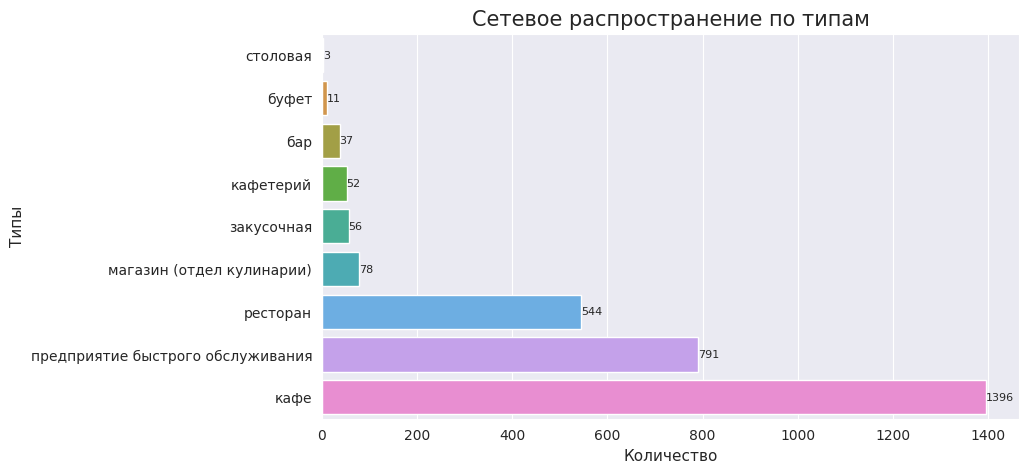

In [11]:
# типа объекта общественного питания, для которого характерно сетевое распространение.
df_chain = df[df['chain'] == 'да']

fig = plt.figure(figsize = (9, 5))
ax = sns.countplot(y = df_chain['object_type'], order = df_chain['object_type'].value_counts().index[::-1])
ax.set_title('Сетевое распространение по типам', fontsize = 15)
ax.set_xlabel('Количество', fontsize = 11)
ax.set_ylabel('Типы', fontsize = 11)
for label in ax.containers: # подпись количества
    ax.bar_label(label, fontsize = 8)
plt.show()

In [12]:
#  среднее количество посадочных мест.
# тип заведения, где в среднем самое большое количество посадочных мест.
number_mean = df_chain['number'].mean().round(2)  #  среднее количество посадочных мест вообще
number_mean

52.92

In [13]:
df_sred = df_chain.groupby(['object_type'])[['number']].mean().round(2) # сгруппировали
df_sred.reset_index(inplace = True, level = ['object_type'])  # присвоили нормальные индексы. ранее индексами были object_type
my_df = df_sred.sort_values(by = ['number']) # сортируем в порядке возрастания
my_df

,object_type,number
5,магазин (отдел кулинарии),8.68
4,кафетерий,12.27
1,буфет,12.73
2,закусочная,14.38
6,предприятие быстрого обслуживания,40.17
3,кафе,47.43
0,бар,53.03
7,ресторан,100.23
8,столовая,112.33


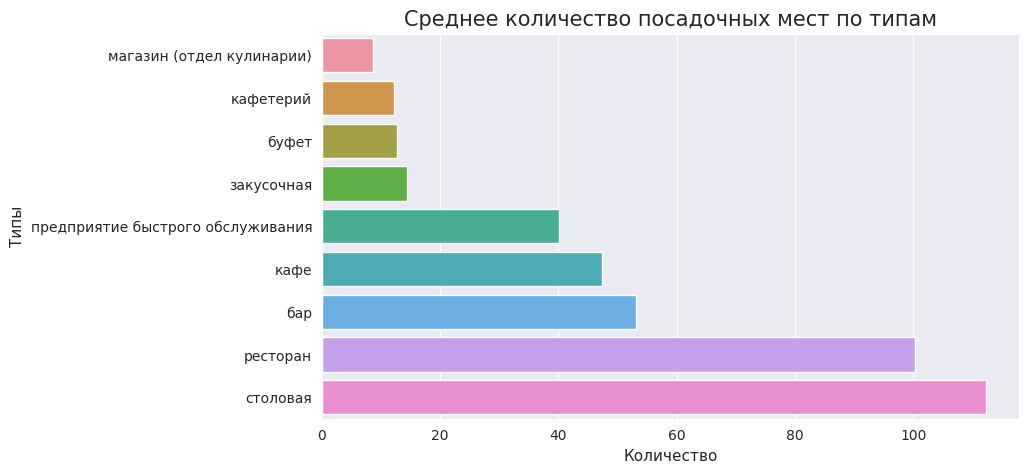

In [14]:
fig = plt.figure(figsize = (9, 5))
ax = sns.barplot(x = 'number', y = 'object_type', data = my_df, )
ax.set_title('Среднее количество посадочных мест по типам', fontsize = 15)
ax.set_xlabel('Количество', fontsize = 11)
ax.set_ylabel('Типы', fontsize = 11)
plt.show()

In [15]:
# в отдельный столбец информацию об улице из столбца address

In [16]:
df[['address_1', 'address_2', 'address_3', 'address_4']] = df['address'].str.split(',', 3 , expand = True)
df[df['address_2'].str.contains('улица|проспект|шоссе|проезд|переулок')]
df_street = df[df['address_2'].str.contains('улица|проспект|шоссе|проезд|переулок')]
df_street['address_2'].value_counts().to_frame()
df_street = df_street['address_2'].value_counts().to_frame().reset_index()
df_street.columns = ['street', 'amount']
df_street.head(10)

<ipython-input-16-753dd96dd04d>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['address_1', 'address_2', 'address_3', 'address_4']] = df['address'].str.split(',', 3 , expand = True)


,street,amount
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Варшавское шоссе,161
4,Ленинский проспект,147
5,проспект Вернадского,132
6,Кутузовский проспект,114
7,Каширское шоссе,112
8,Кировоградская улица,110
9,Ленинградское шоссе,100


In [17]:
# график топ-10 улиц по количеству объектов общественного питания

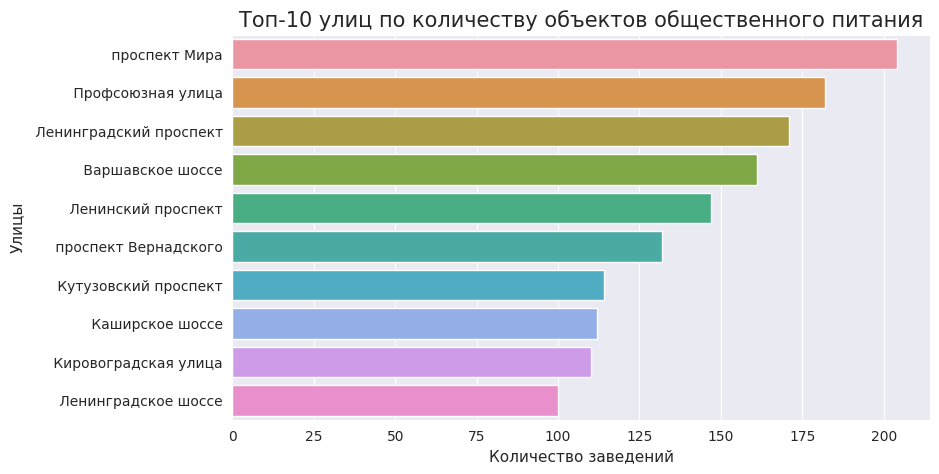

In [18]:
fig = plt.figure(figsize = (9, 5))
ax = sns.barplot(y = 'street', x = 'amount', data = df_street[0:10])
ax.set_title('Топ-10 улиц по количеству объектов общественного питания', fontsize = 15)
ax.set_xlabel('Количество заведений', fontsize = 11)
ax.set_ylabel('Улицы', fontsize = 11)
plt.show()

# **Вывод.**

Всего заведений в датасете: 15 366.
По количеству - наиболее распространены заведения типа:

кафе, стловая, ресторан и предприятие быстрого обслуживания.

Несетевых заведений больше, чем сетевых.

Среди сетевых чаще встречаются: кафе, предприятие быстрого обслуживания и рестораны.

Среднее количество посадочных мест по заведениям - 52,92.

Наибольшее среднее количество посадочных мест у заведений типа столовая (в среднем 112 мест) и ресторан (в среднем 100 мест).

Топ-3 улицы по количеству заведений: Проспект Мира, Профсоюзная улица, Ленинградский проспект.
